In [7]:
import pandas as pd  
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 

In [8]:
dt = pd.read_csv(r'C:\Users\NET\Desktop\data work\data\pizza.csv')
dt

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [10]:
dt.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [11]:
dt['order_date'] = pd.to_datetime(dt['order_date'])

C:\Users\NET\AppData\Local\Temp\ipykernel_22784\2958599231.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dt['order_date'] = pd.to_datetime(dt['order_date'])


In [12]:
dt.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [13]:
dt.drop(columns= 'pizza_ingredients', inplace = True)

In [14]:
dt.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,The Classic Deluxe Pizza


In [16]:
qggsum = dt.groupby('pizza_size')['total_price'].sum().reset_index()
qggsum

,pizza_size,total_price
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


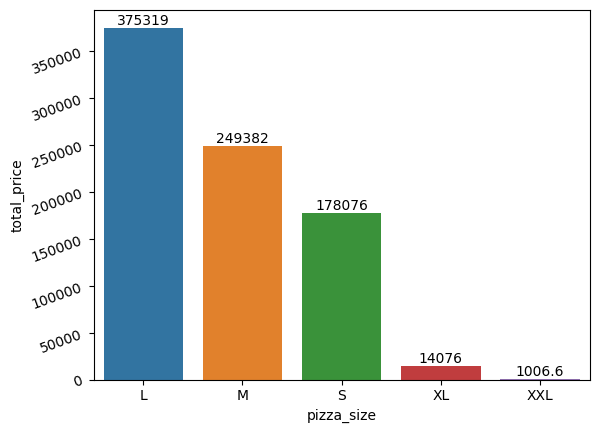

In [17]:
oggsum = sns.barplot(qggsum, x='pizza_size', y= 'total_price',)
plt.yticks(rotation= 20)
for i in oggsum.containers:
    oggsum.bar_label(i,)
plt.show()

L size is the most size with revenue in the year.



In [18]:
dt.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,The Classic Deluxe Pizza


In [19]:
months = dt.groupby((dt['order_date'].dt.month)) ['total_price'].sum().reset_index().sort_values(by = 'total_price', ascending = False)
months

,order_date,total_price
0,1,71620.15
2,3,71301.40
10,11,71004.85
6,7,70880.65
3,4,70312.00
7,8,69497.30
5,6,68161.45
9,10,68152.20
4,5,67648.80
1,2,64419.45


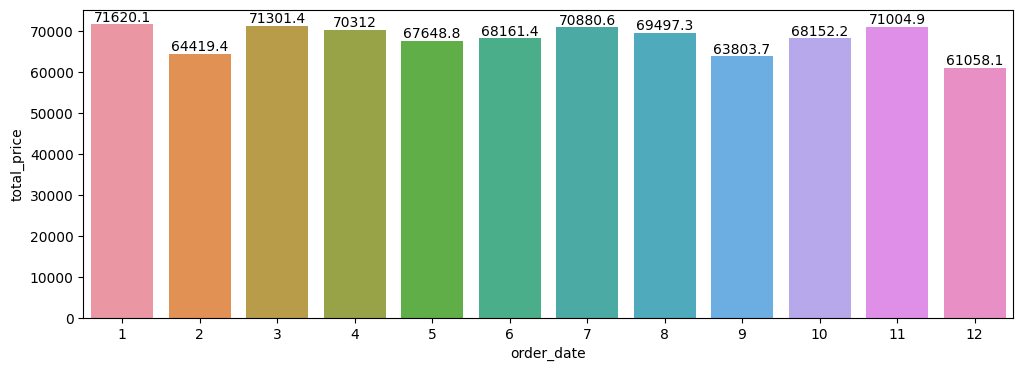

In [20]:
plt.figure(figsize=(12,4))
month1 = sns.barplot(months, x= 'order_date', y = 'total_price')
for i in month1.containers:
    month1.bar_label(i,)

the month january is the highest in revenue 

In [21]:
top_five = dt['pizza_name_id'].value_counts().reset_index().head(5)
top_five

,index,pizza_name_id
0,big_meat_s,1811
1,thai_ckn_l,1365
2,five_cheese_l,1359
3,four_cheese_l,1273
4,classic_dlx_m,1159


<Figure size 1200x1500 with 0 Axes>

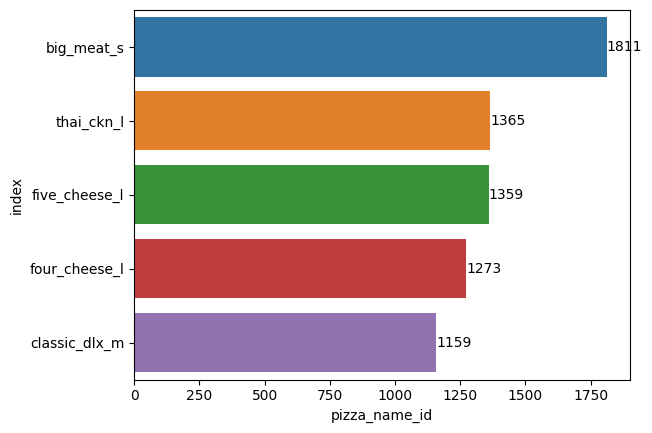

<Figure size 1200x1500 with 0 Axes>

In [22]:

ar = sns.barplot(y='index', x= 'pizza_name_id', data = top_five)
for i in ar.containers:
    ar.bar_label(i,)
plt.figure(figsize=(12,15))

the pizza id name BIG_MEAT_S is the most selling

In [23]:
dt.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,The Classic Deluxe Pizza


In [24]:
pizzaname = dt.pizza_name.value_counts().nlargest(5).reset_index()
pizzaname

,index,pizza_name
0,The Classic Deluxe Pizza,2416
1,The Barbecue Chicken Pizza,2372
2,The Hawaiian Pizza,2370
3,The Pepperoni Pizza,2369
4,The Thai Chicken Pizza,2315


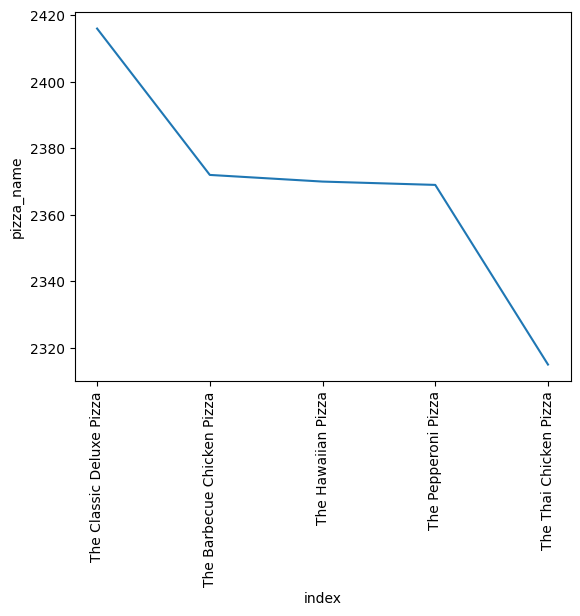

In [25]:
pn = sns.lineplot(data= pizzaname , y='pizza_name', x='index' )
plt.xticks(rotation= 90)
plt.show()


the classic deluxe is the most pizza_name selling in the year.